<a href="https://colab.research.google.com/github/Uppala007/ADS-DL/blob/main/ADS_with_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/My Drive/Dataset/Diabetic Retinopathy.zip" -d "/content/drive/My Drive/Dataset"

GPU is available
Found 2076 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


Epoch 1/15
64/64 [==============================] - 445s 7s/step - loss: 0.6410 - accuracy: 0.6893 - val_loss: 0.2677 - val_accuracy: 0.9121
Epoch 2/15
64/64 [==============================] - 32s 498ms/step - loss: 0.3263 - accuracy: 0.8606 - val_loss: 0.2888 - val_accuracy: 0.9062
Epoch 3/15
64/64 [==============================] - 33s 512ms/step - loss: 0.2935 - accuracy: 0.8875 - val_loss: 0.2967 - val_accuracy: 0.9082
Epoch 4/15
64/64 [==============================] - 33s 517ms/step - loss: 0.3103 - accuracy: 0.8811 - val_loss: 0.2575 - val_accuracy: 0.9004
Epoch 5/15
64/64 [==============================] - 32s 499ms/step - loss: 0.2566 - accuracy: 0.9056 - val_loss: 0.2954 - val_accuracy: 0.8340
Epoch 6/15
64/64 [==============================] - 33s 512ms/step - loss: 0.2392 - accuracy: 0.9149 - val_loss: 0.2201 - val_accuracy: 0.9082
Epoch 7/15
64/64 [==============================] - 31s 492ms/step - loss: 0.2548 - accuracy: 0.9114 - val_loss: 0.2528 - val_accuracy: 0.9199
E

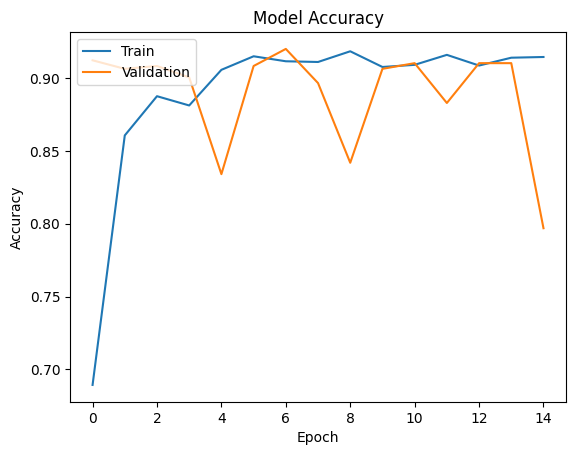

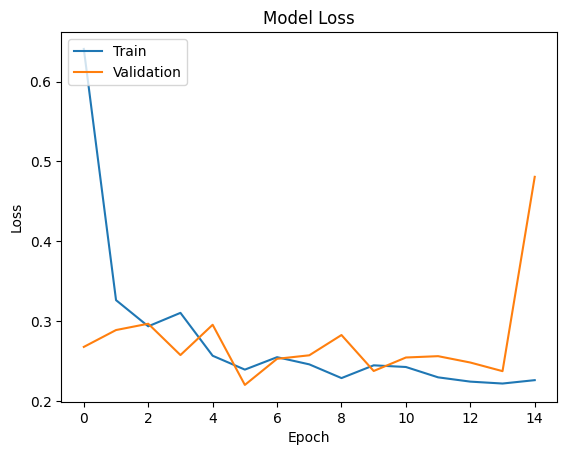

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
    print('GPU is available')
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print('GPU is not available')

base_dir = '/content/drive/My Drive/Dataset/Diabetic Retinopathy'  # Update this path
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
#test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
img_width, img_height = 224, 224  # Adjust based on your dataset
batch_size = 32

# Data Generators for Training and Validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directory
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = valid_test_datagen.flow_from_directory(valid_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='binary')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Plotting Training and Validation Accuracy and Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save model
model.save('/content/diabetic_retinopathy_classifier.h5')

Found 231 images belonging to 2 classes.
8/8 [==============================] - 34s 5s/step
              precision    recall  f1-score   support

          DR       0.74      0.91      0.82       113
       No_DR       0.89      0.69      0.78       118

    accuracy                           0.80       231
   macro avg       0.82      0.80      0.80       231
weighted avg       0.82      0.80      0.80       231



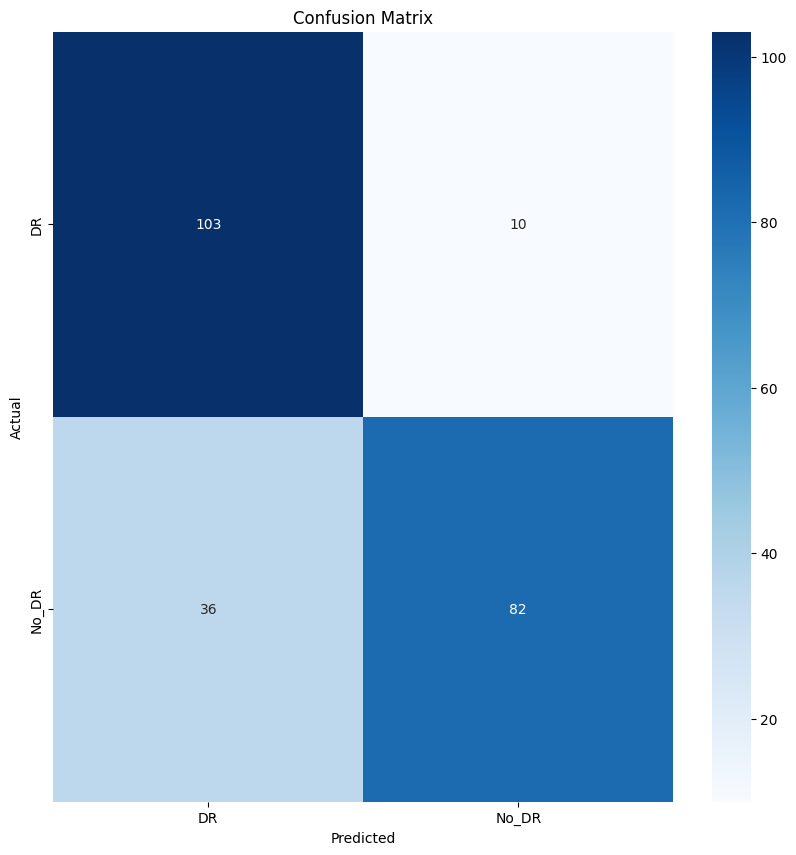

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('/content/diabetic_retinopathy_classifier.h5')

# Set the path to your test dataset
test_dir = os.path.join(base_dir, 'test')

# Prepare the test generator
test_generator = valid_test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='binary', shuffle=False)

# Evaluate the model on the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).reshape(-1)
true_classes = test_generator.classes

# Classification report and Confusion Matrix
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()